In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder


### Importing Datasets

In [2]:
train_df=pd.read_csv("C:/Users/david/OneDrive/Desktop/Train Dataset .csv")
test_df=pd.read_csv("C:/Users/david/OneDrive/Desktop/Test Dataset.csv")
sub_df=pd.read_csv("C:/Users/david/OneDrive/Desktop/Sample Submission.csv")


In [3]:
train_df

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1


In [4]:
train_df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [6]:
train_df.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
train_df.isnull()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
test_df

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,14964,34,0,3,136,291,0,1,163,0,2.6,2,2,3
2693,16774,72,0,1,104,166,1,2,95,1,0.3,0,2,2
2694,18884,31,1,0,153,457,1,1,170,1,3.8,0,3,1
2695,10000,71,0,0,111,242,1,0,147,1,5.3,0,1,2


In [9]:
test_df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000
mean,14939.832036,53.064516,0.488691,1.504264,146.384872,344.027809,0.497219,1.021135,135.993326,0.484613,3.142714,1.011494,2.032258,1.473489
std,2888.940621,14.350978,0.499965,1.112747,30.640580,127.265038,0.500085,0.811590,38.419913,0.499856,1.810003,0.814976,1.397353,1.120744
min,10000.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12455.000000,41.000000,0.000000,1.000000,121.000000,233.000000,0.000000,0.000000,103.000000,0.000000,1.600000,0.000000,1.000000,0.000000
50%,14854.000000,53.000000,0.000000,1.000000,147.000000,344.000000,0.000000,1.000000,136.000000,0.000000,3.200000,1.000000,2.000000,1.000000
75%,17465.000000,66.000000,1.000000,3.000000,172.000000,455.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000
max,19999.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


### target distribution

In [11]:
sns.style=('darkgrid')

(array([1362.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5941.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

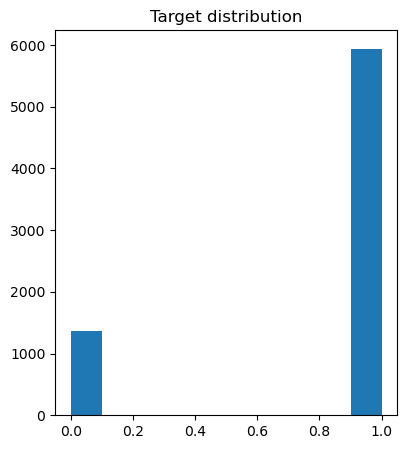

In [12]:
plt.figure(figsize=[15,5])


plt.subplot(1,3,2)
plt.title("Target distribution")
plt.hist(data=train_df, x = "target")

<Axes: >

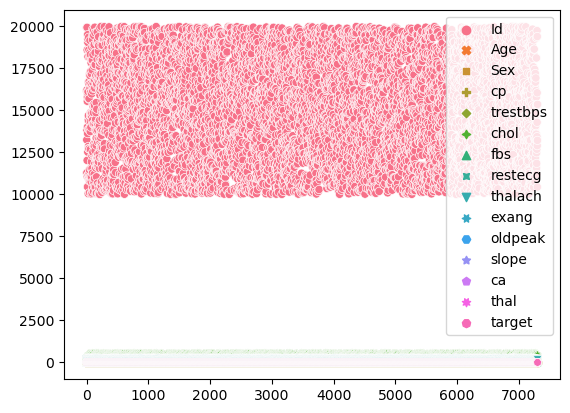

In [13]:
sns.scatterplot(train_df)

<Axes: ylabel='Age'>

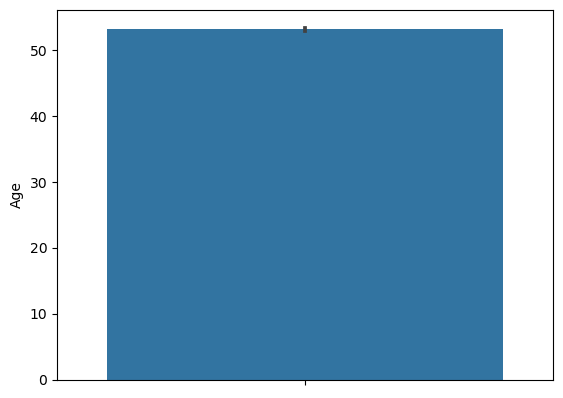

In [14]:
sns.barplot(y="Age", data=train_df)

<Axes: xlabel='sex', ylabel='cp'>

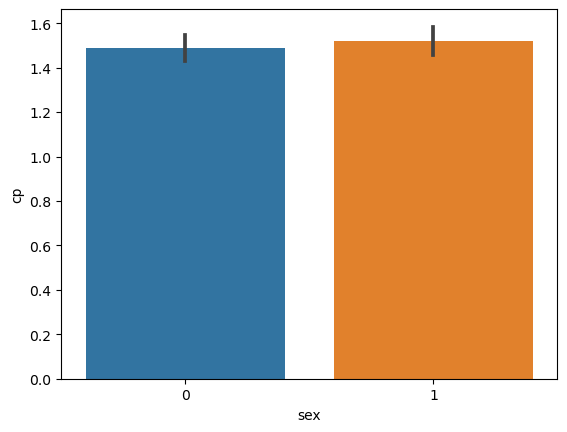

In [15]:
sns.barplot(x="sex", y="cp", data=test_df)

<Axes: xlabel='cp', ylabel='Count'>

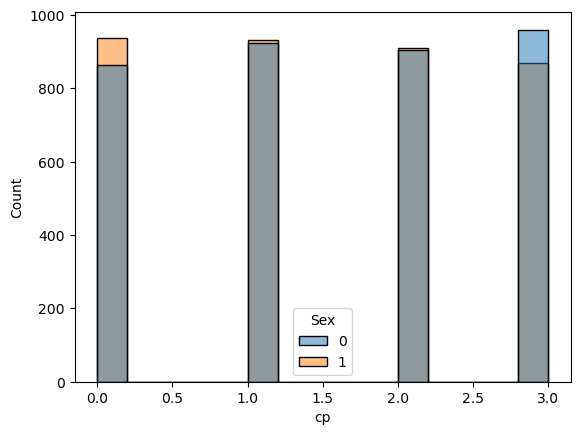

In [16]:
sns.histplot(x="cp", data=train_df, hue='Sex')

## Histogram numerical features

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>],
       [<Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

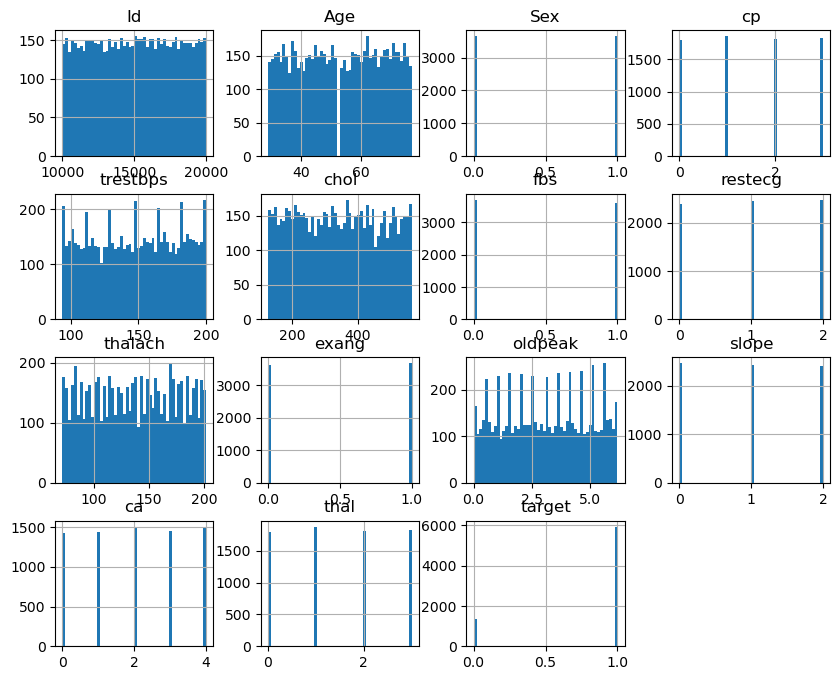

In [17]:
train_df.hist(figsize=[10,8],bins=50)

## Box plot numerical features

<Axes: >

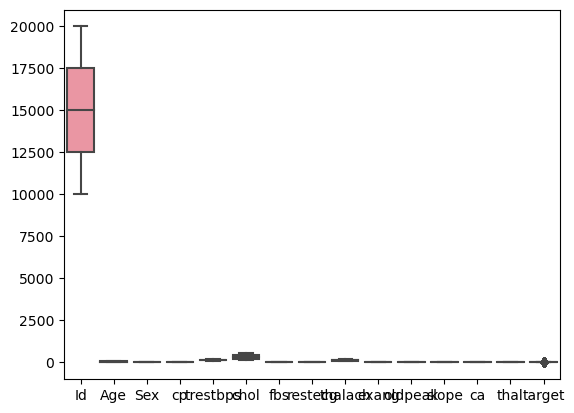

In [18]:
sns.boxplot(train_df)

## correlation matrix

In [19]:
corr=train_df.corr()

<Axes: >

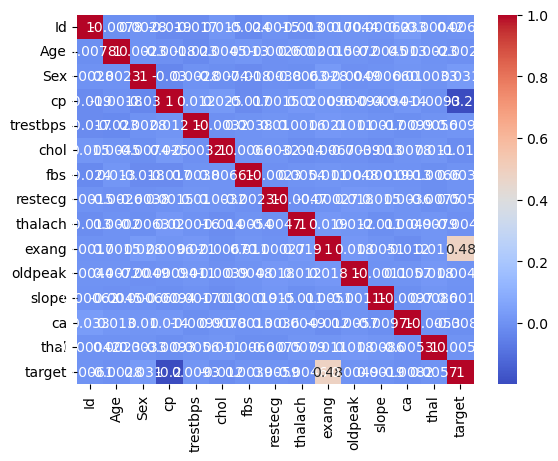

In [20]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

## making all data int64

In [21]:
train_df["old peak"] = train_df["oldpeak"].astype('int64')

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
 15  old peak  7303 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 913.0 KB


In [23]:
train_df.drop("oldpeak",axis=1)

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target,old peak
0,16167,33,0,1,158,205,1,0,154,0,1,4,1,1,1
1,11275,53,1,2,198,154,0,1,104,0,2,1,0,0,0
2,13251,37,1,2,101,202,1,0,155,0,1,3,1,1,2
3,19921,75,0,0,113,306,1,2,88,1,0,2,2,1,4
4,11293,35,1,2,139,419,1,1,166,1,2,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,107,177,1,2,119,0,1,0,0,0,2
7299,10446,42,1,2,96,551,1,2,76,0,2,3,2,1,1
7300,13219,51,1,0,151,165,1,0,190,1,0,0,2,1,0
7301,15349,29,0,0,195,287,1,2,161,1,1,1,0,1,3


In [24]:
train_df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old peak
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1,2
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1,4
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1,0


In [25]:
test_df["old peak"]= test_df["oldpeak"].astype('int64')

In [26]:
test_df

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,old peak
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1,2
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2,4
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0,5
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,14964,34,0,3,136,291,0,1,163,0,2.6,2,2,3,2
2693,16774,72,0,1,104,166,1,2,95,1,0.3,0,2,2,0
2694,18884,31,1,0,153,457,1,1,170,1,3.8,0,3,1,3
2695,10000,71,0,0,111,242,1,0,147,1,5.3,0,1,2,5


In [27]:
test_df.drop("oldpeak", axis=1)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,old peak
0,16501,70,1,0,163,495,0,2,170,1,1,0,1,2
1,10444,61,1,0,131,238,0,2,74,1,2,2,2,4
2,14288,53,1,0,95,558,1,1,73,1,1,1,0,0
3,10409,37,0,1,178,287,0,1,192,1,1,0,0,5
4,17330,35,0,3,104,281,0,0,122,0,1,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,14964,34,0,3,136,291,0,1,163,0,2,2,3,2
2693,16774,72,0,1,104,166,1,2,95,1,0,2,2,0
2694,18884,31,1,0,153,457,1,1,170,1,0,3,1,3
2695,10000,71,0,0,111,242,1,0,147,1,0,1,2,5


## importing machine learning model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## load data

In [29]:
X=train_df.drop('target',axis=1)
y=train_df['target']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)



## scale data

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Train data

In [32]:
rf=RandomForestClassifier(
    n_estimators=100,n_jobs=4,min_samples_leaf=9,min_samples_split=9,class_weight='balanced',criterion='gini',max_depth=5,
)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=9,
                       min_samples_split=9, n_jobs=4)

In [33]:
xgb_model=xgb.XGBClassifier(n_estimators=100,learning_rate=0.02,gamma=0.6,colsample_bytree=0.7,reg_lambda=0.1,subsample=0.6,max_depth=4, n_jobs=1,max_leaves=10,)
xgb_model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.6, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=1,
              num_parallel_tree=None, random_state=None, ...)

## Stack predictions

In [34]:
rf_pred=rf.predict_proba(X_test_scaled)
xgb_pred=xgb_model.predict_proba(X_test_scaled)
stacked_pred=(rf_pred+xgb_pred)/2

In [35]:
accuracy=accuracy_score(y_test,stacked_pred.argmax(-1))
print("Stacked accuarcy score",accuracy)
print("Classification Report:\n", classification_report(y_test,stacked_pred.argmax(-1)))

Stacked accuarcy score 0.8199863107460643
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.98      0.66       260
           1       0.99      0.79      0.88      1201

    accuracy                           0.82      1461
   macro avg       0.75      0.88      0.77      1461
weighted avg       0.91      0.82      0.84      1461



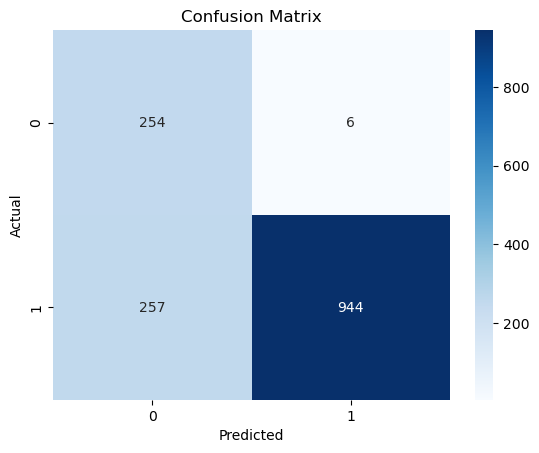

In [36]:
# Confusion matrix
cm = confusion_matrix(y_test,stacked_pred.argmax(-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

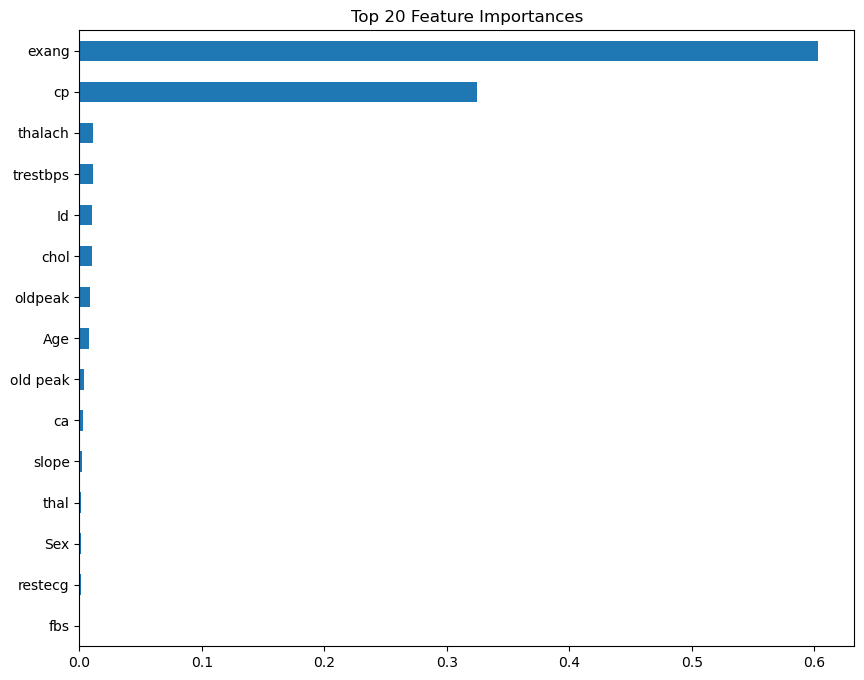

In [37]:
# Get the feature importances from the classifier
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort the feature importances and select the top 20
top_20_features = feature_importances.sort_values(ascending=False).head(20)

# Plot the top 20 feature importances
top_20_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 20 Feature Importances')
plt.show()

In [46]:
predictions =(rf.predict(test_df) + xgb_model.predict(test_df)) /2 

C:\Users\david\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [47]:
lame_df=sub_df.copy()
lame_df["target"]=predictions
lame_df.to_csv('Second submission.csv',index=False)

In [48]:
lame_df.head()

,Id,target
0,16501,0.5
1,10444,0.5
2,14288,1.0
3,10409,0.5
4,17330,0.5
